In [23]:
#Clean up the data

%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

#Read in Spine dataset
data=pd.read_csv("../Tech Fundamentals/Dataset_spine.csv")

#Drop the extra column
data.drop('Unnamed: 13', inplace=True, axis=1)

#Change the 'Class_att' column into categories
data=pd.concat([data, pd.get_dummies(data['Class_att'])], axis=1)

#Drop the 'Normal' and 'Class_att' columns in order to just look at abnormal data
data.drop(['Normal','Class_att'],inplace=True,axis=1)

#Rename columns with appropriate variable names
data.columns=["PelvicIncidence",'PelvicTilt','LumbarLordosisAngle',
               'SacralSlope', 'PelvicRadius','SpondylolisthesisDegree',
               'PelvicSlope','DirectTilt','ThoracicSlope',
               'CervicalTilt','SacrumAngle','ScoliosisSlope','Outcome']

In [25]:
data.head()
data.describe()

,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,SpondylolisthesisDegree,PelvicSlope,DirectTilt,ThoracicSlope,CervicalTilt,SacrumAngle,ScoliosisSlope,Outcome
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


In [31]:
#run a PCA to understand the variance of the data
#run LDA to determine directions of separation between data classes
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca=PCA(n_components=12)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'Scoliosis Slope')

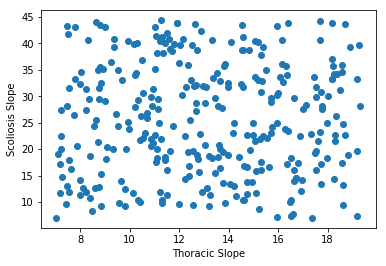

In [35]:
import seaborn as sns

plt.scatter(data['ThoracicSlope'],data['ScoliosisSlope'])
plt.xlabel('Thoracic Slope')
plt.ylabel('Scoliosis Slope')

#sns.regplot(data['ThoracicSlope'],data['ScoliosisSlope'], scatter=True)